In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import confusion_matrix,r2_score

In [2]:
iris = load_iris()
x = pd.DataFrame(iris.data,columns=iris.feature_names)
y = pd.Categorical.from_codes(iris.target, iris.target_names)
y

['setosa', 'setosa', 'setosa', 'setosa', 'setosa', ..., 'virginica', 'virginica', 'virginica', 'virginica', 'virginica']
Length: 150
Categories (3, object): ['setosa', 'versicolor', 'virginica']

In [3]:
y = pd.get_dummies(y)
X_trian, X_test,y_trian,y_test = train_test_split(x,y, test_size=0.2, random_state=20)
y

,setosa,versicolor,virginica
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
145,0,0,1
146,0,0,1
147,0,0,1
148,0,0,1


In [4]:
clf = DecisionTreeClassifier()
clf.fit(X_trian,y_trian)

DecisionTreeClassifier()

In [5]:
y_pred = clf.predict(X_test)

species = np.array(y_test).argmax(axis=1)
predictions = np.array(y_pred).argmax(axis=1)
confusion_matrix(species, predictions)

array([[ 8,  0,  0],
       [ 0, 11,  0],
       [ 0,  2,  9]], dtype=int64)

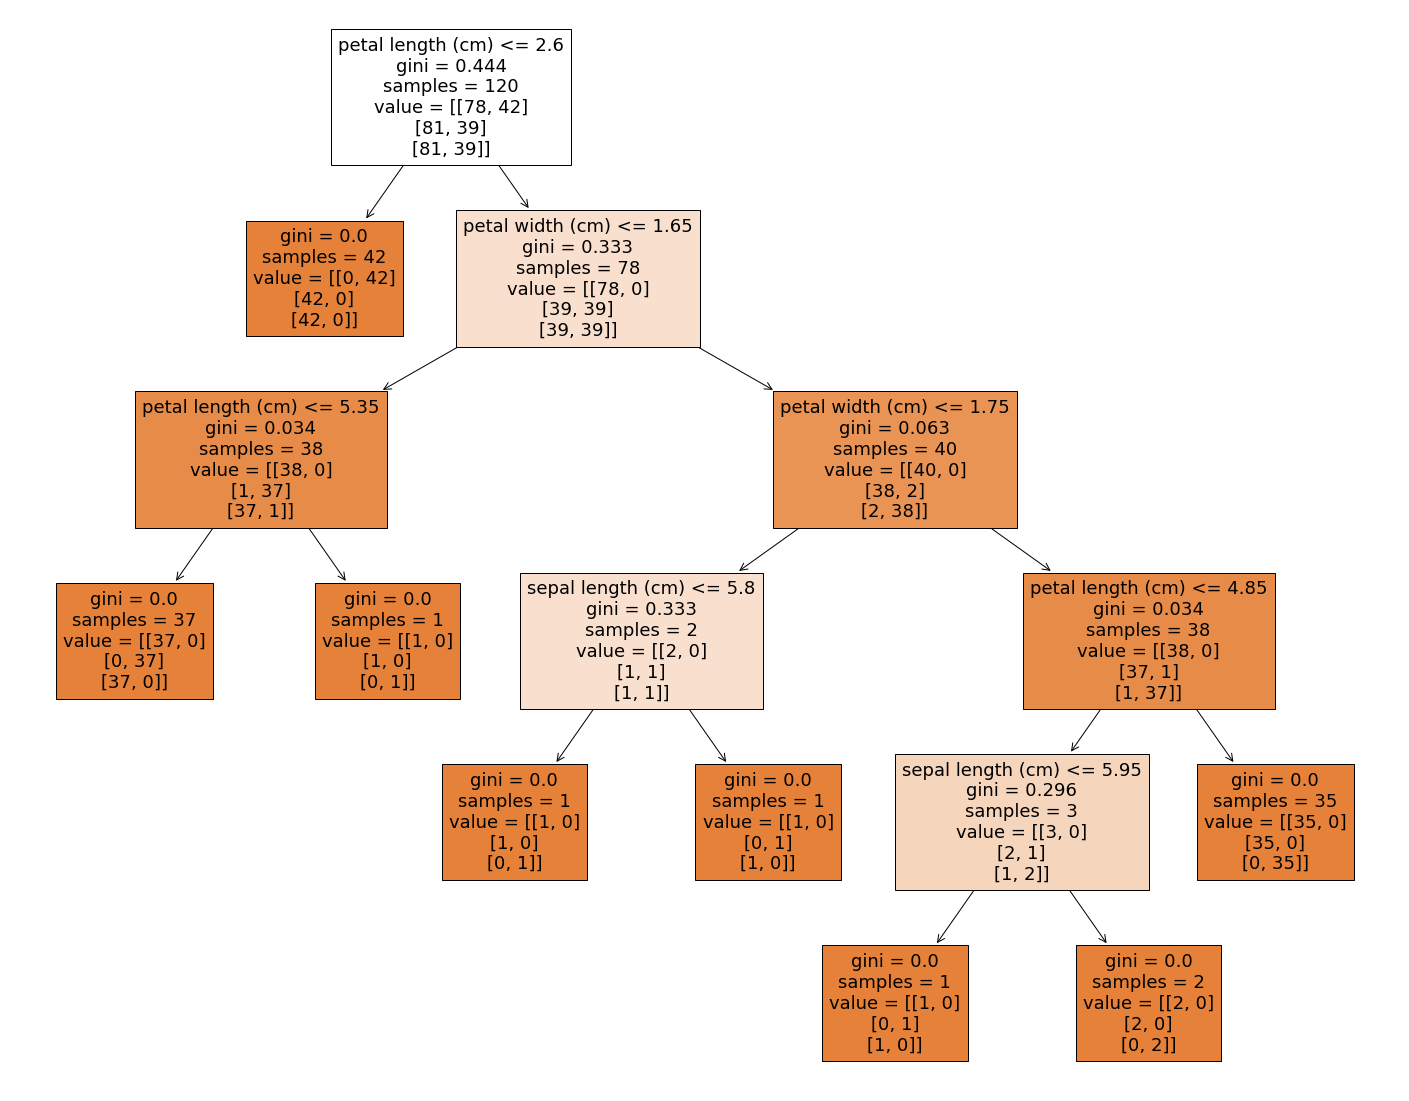

In [6]:
fig = plt.figure(figsize=(25,20))
var = tree.plot_tree(clf,feature_names=iris.feature_names,class_names=iris.target_names,filled=True)
# var

# Second dataset Regression

In [7]:
from sklearn.datasets import load_boston 
from sklearn.metrics import mean_squared_error

In [10]:
lb_df = load_boston()
df = pd.DataFrame(lb_df.data,columns=lb_df.feature_names)
df["MEDV"] = lb_df.target
display(df.info())
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


None

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [11]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
a=df.drop("MEDV",axis=1)
a = sc.fit_transform(a)
# b = df["MEDV"]
a_train,a_test,b_train,b_test = train_test_split(a,df["MEDV"],test_size=0.2,random_state=2)

In [12]:
dcr = DecisionTreeRegressor()
dcr.fit(a_train,b_train)

DecisionTreeRegressor()

In [13]:
b_pred = dcr.predict(a_test)
b_pred

array([20. , 20.8, 28.5, 36.2,  7.2, 17.8, 31. , 28. , 15. , 19.6, 22.8,
       30.8, 18.9, 21.8, 10.2, 24.7, 19.3,  9.5,  8.8, 14.9, 22.2, 20.4,
       33.8, 16.6, 14.2, 16.2, 46. , 33.2, 33.3, 23.4, 10.9, 23.4, 33.1,
       23.1, 27.5, 13.1, 12.3, 23.2, 17.5, 21.7, 28.4, 13.1, 31.7,  7.2,
       19.1, 14.2, 34.9, 19.4, 33.8, 17.2, 30.5, 22.5,  7.2, 33.1, 15. ,
       19.6, 19.5, 23.1, 18.4, 19.4, 20.4, 23.1, 17.8, 32. , 31.6, 25. ,
       50. , 31. ,  8.5, 22. , 19.7,  5.6, 11.9, 19.1, 30.1, 23.7, 20.6,
       24. , 17.2, 24.7, 33.1, 16.6, 19.1, 31.2, 44.8, 33.8, 10.9, 19.8,
       30.5, 20.6, 19.6, 19.2, 13.1, 33.3, 43.1,  8.7, 46. , 34.9, 18.8,
       15.2, 29.8, 23.1])

In [14]:
display(mean_squared_error(b_pred,b_test))
r2_score(b_pred,b_test)

19.463039215686273

0.7717404154932054

In [16]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000
